In [2]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.inspection import permutation_importance, plot_partial_dependence
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import (GridSearchCV, KFold, StratifiedKFold,
                                     train_test_split)
from sklearn.neural_network import MLPClassifier
import collections

In [25]:
url = 'https://drive.google.com/file/d/1E9bFoMAwMVPMkZHmMQfWvSgaWoCLtKp4/view?usp=share_link'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
y_test_autoencoder = pd.read_pickle(url)

url = 'https://drive.google.com/file/d/1dknbQLJhQsbSFDNIpwjxZQwPc3fF14yF/view?usp=share_link'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
y_train_autoencoder = pd.read_pickle(url)


url = 'https://drive.google.com/file/d/105vmXogIQU8srmtdzfCHYQ9G-T7Iu5hl/view?usp=share_link'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
X_test_autoencoder = pd.read_pickle(url)

url = 'https://drive.google.com/file/d/1QemU274E0c14R8uknuipP20rNgDSLzcg/view?usp=share_link'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
X_train_autoencoder = pd.read_pickle(url)

In [5]:
y_test_autoencoder.shape

(103495,)

In [6]:
y_train_autoencoder.shape

(796896,)

In [7]:
X_test_autoencoder.head()

,0,1,2,3,4,5,6,7,8,9
0,12.402391,14.111757,9.855756,19.268991,5.220062,5.571196,0.000000,11.383184,1.007749,4.936933
1,4.612013,4.935200,7.515782,0.953602,13.012198,13.453751,8.786350,5.749897,2.933392,6.159844
2,7.377332,11.539225,3.783570,2.553127,3.887723,10.602369,1.870071,2.259041,5.891182,7.863156
3,5.857890,7.766523,3.677555,1.562993,5.219331,11.775371,6.793038,4.803222,2.995486,5.428815
4,9.456554,11.459286,17.851839,22.885075,16.009602,5.394529,0.000000,10.993926,6.987707,6.111645


In [8]:
X_train_autoencoder.head()

,0,1,2,3,4,5,6,7,8,9
0,4.797675,7.613662,3.424433,0.890239,2.669715,11.703793,6.787732,4.545719,3.268740,6.372485
1,7.937324,5.636225,6.277394,3.072316,2.182857,19.101315,12.539018,9.285725,3.117785,6.788941
2,6.025184,6.660750,4.287274,1.600477,5.272965,13.708441,8.960558,6.235799,2.528111,5.360302
3,6.662344,8.159066,7.697234,1.561853,20.870443,8.352842,2.124194,2.122555,5.134689,5.772576
4,5.559582,6.136704,6.856173,2.790976,3.218834,18.821775,12.625456,8.546290,1.763956,6.631335


In [10]:

# Define neural network classifier
clf = MLPClassifier()

# Define hyperparameters grid for grid search
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01],
}

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Define scoring metric as AUC
scoring = 'roc_auc'

# Perform grid search with cross-validation and AUC as the scoring metric
grid_search = GridSearchCV(clf, param_grid=param_grid, scoring=scoring, cv=cv, n_jobs=-1)
grid_search.fit(X_train_autoencoder, y_train_autoencoder)

# Print best hyperparameters and AUC score
print("Best parameters: ", grid_search.best_params_)
print("AUC score: ", grid_search.best_score_)

Best parameters:  {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (100,)}
AUC score:  0.9999833735918736


In [23]:
#retrain the model by using all data
nnet_retrain = MLPClassifier(activation='tanh',alpha=0.001,hidden_layer_sizes=(100,))
nnet_retrain.fit(X_train_autoencoder, y_train_autoencoder)
yhat_test = nnet_retrain.predict(X_test_autoencoder)

In [26]:
#AUC performance in test set
ROC_AUC_nnet = roc_auc_score(y_test_autoencoder, yhat_test)
print('ROC AUC for Neural Network in test dataset : {:.4f}'.format(ROC_AUC_nnet))

ROC AUC for Neural Network in test dataset : 0.9953


In [31]:
nnet_retrain

MLPClassifier(activation='tanh', alpha=0.001)

In [ ]:
#convert to pickle file for latter running
pickle.dump(nnet_retrain, open('NeuralNetworkModel.pkl', 'wb'))

---------------------------------------------------------------------------

Hot wire from here using the best model:

In [22]:
# Load the model from the pickle file
with open('NeuralNetworkModel.pkl', 'rb') as f:
    model = pickle.load(f)

/nfs/home/zle2435/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LabelBinarizer from version 1.2.1 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/nfs/home/zle2435/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator MLPClassifier from version 1.2.1 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [6]:
model

MLPClassifier(activation='tanh', alpha=0.001)

In [10]:
# Calculate the performance in test set
yhat_test_pickle = model.predict(X_test_autoencoder)
ROC_AUC_nn = roc_auc_score(y_test_autoencoder, yhat_test_pickle)
print('ROC AUC for Random Forest in test dataset : {:.4f}'.format(ROC_AUC_nn))

ROC AUC for Random Forest in test dataset : 0.9953


#### Feature Importance Analysis

Best model, we want to show feature importance. The MLPClassifier in scikit-learn does not have an inherent feature importance attribute, as it is a black-box model that does not allow direct interpretation of feature weights or importance. So we use the following alternatives.

**Permutation Importance**

In [26]:
X_test = X_test_autoencoder
y_test = y_test_autoencoder
# Compute feature importances using permutation importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=0)
# Print the feature importances
for i, importance in enumerate(result.importances_mean):
    # index the feature
    ind = ''
    if i == 0: 
        ind = '1st'
    elif i == 1:
        ind = '2nd'
    elif i == 2:
        ind = '3rd'
    else:
        ind = f'{i+1}th'
    print(f'{ind} feature: {importance:.3f}')

1st feature: 0.077
2nd feature: 0.268
3rd feature: 0.103
4th feature: 0.405
5th feature: 0.119
6th feature: 0.127
7th feature: 0.084
8th feature: 0.217
9th feature: 0.243
10th feature: 0.068


The higher the mean importance, the more important the feature. We can see that the forth feature has the highest permutation importance - it's about 50% more than the second most one.

**Partial Dependence Plots**

Feature: 0, Score: 0.07677


/nfs/home/zle2435/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


Feature: 1, Score: 0.26763


/nfs/home/zle2435/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


Feature: 2, Score: 0.10297


/nfs/home/zle2435/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


Feature: 3, Score: 0.40470


/nfs/home/zle2435/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


Feature: 4, Score: 0.11851


/nfs/home/zle2435/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


Feature: 5, Score: 0.12698


/nfs/home/zle2435/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


Feature: 6, Score: 0.08413


/nfs/home/zle2435/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)
/nfs/home/zle2435/.local/lib/python3.10/site-packages/sklearn/inspection/_partial_dependence.py:153: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_eval.iloc[:, variable] = new_values[i]


Feature: 7, Score: 0.21663


/nfs/home/zle2435/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


Feature: 8, Score: 0.24315


/nfs/home/zle2435/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


Feature: 9, Score: 0.06799


/nfs/home/zle2435/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)
/nfs/home/zle2435/.local/lib/python3.10/site-packages/sklearn/inspection/_partial_dependence.py:153: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_eval.iloc[:, variable] = new_values[i]


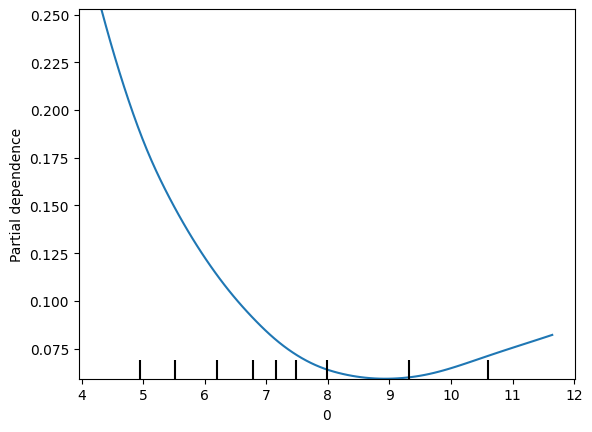

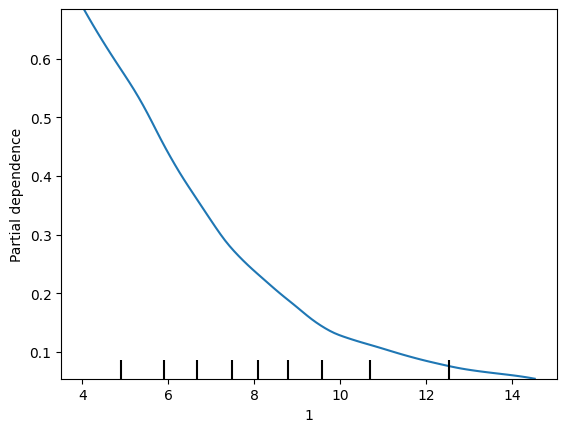

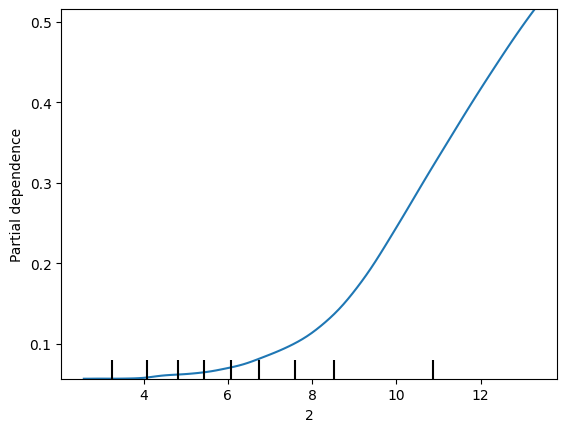

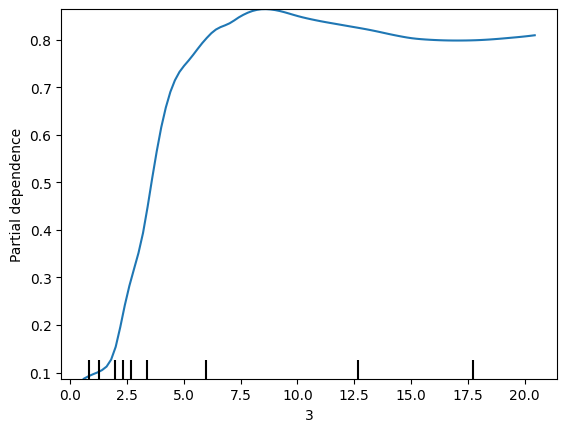

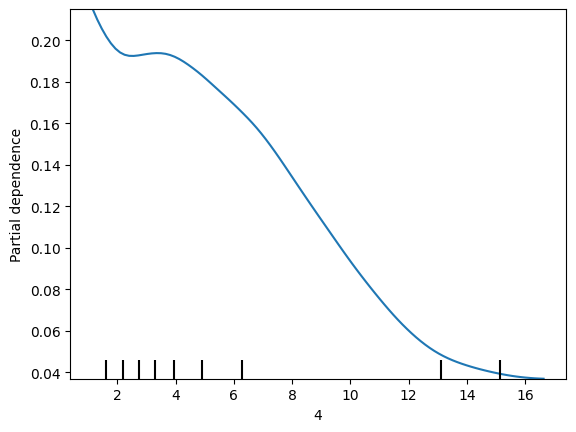

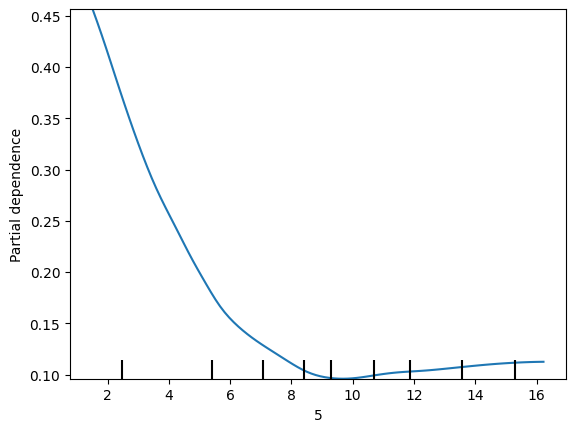

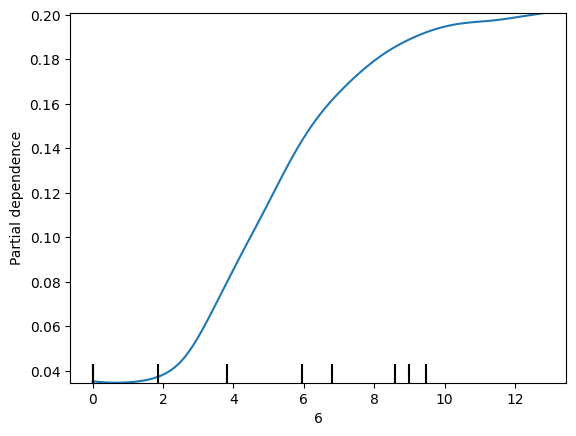

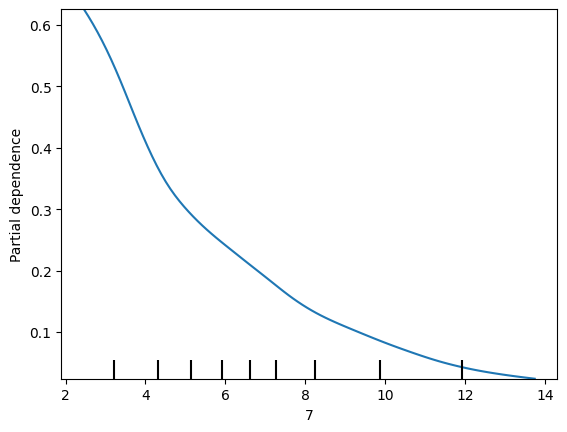

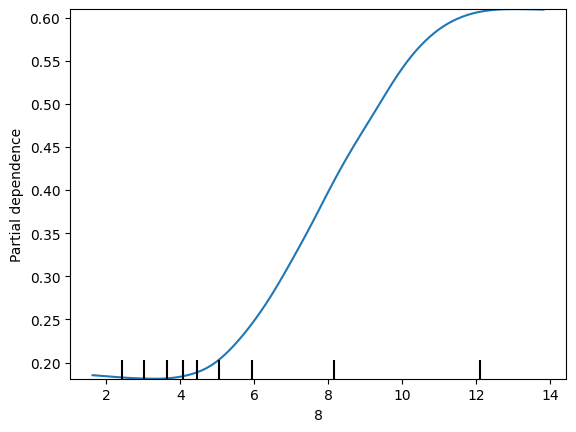

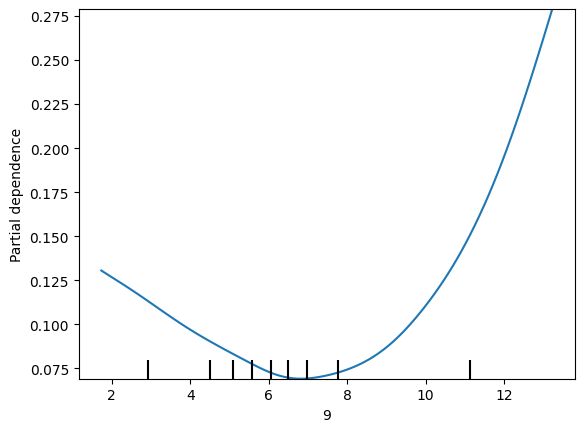

In [20]:
for i in range(0,10):
    print('Feature: %d, Score: %.5f' % (i, result.importances_mean[i]))
    plot_partial_dependence(model, X_test, [i])

We then construct the partial dependence plot in compliance, we can see it's the same story. For the feature with index 3 (4th feature), we saw that the range is the largest (0.1 to 0.8, approximately), and a lot data falls within that range according to the ticks. We are going to decode the model to check what features actually made up of that feature.

In [21]:
# Load the encoder from the pickle file
with open('encoder.pkl', 'rb') as f:
    encoder = pickle.load(f)

2023-03-09 02:26:04.673470: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-09 02:26:04.818317: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-09 02:26:04.818347: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-09 02:26:06.211619: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

Keras model archive loading:
File Name                                             Modified             Size
metadata.json                                  2023-03-09 02:25:40           64
config.json                                    2023-03-09 02:25:40         1894
variables.h5                                   2023-03-09 02:25:40        56392
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......input_layer
.........vars
...vars


2023-03-09 02:26:07.388235: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-09 02:26:07.388267: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-09 02:26:07.388287: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (msia-jupyter): /proc/driver/nvidia/version does not exist
2023-03-09 02:26:07.388480: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [28]:
# number of features that we want to look at
num_reduced_features = 10

In [29]:
# Get the weights of the first layer of the encoder
weights = encoder.get_weights()[0]
# Transpose the weights to have one row per original feature and one column per reduced feature
weights = weights.T
# Find the indices of the original features that contribute most to each of the reduced features
most_important_features = [list(weights[i].argsort()[-num_reduced_features:][::-1]) for i in range(10)]
# Print the most important original features for each reduced feature
for i in range(10):
    print("Reduced feature", i, "is composed of the following original features:", most_important_features[i])

Reduced feature 0 is composed of the following original features: [13, 266, 450, 374, 310, 359, 375, 264, 482, 241]
Reduced feature 1 is composed of the following original features: [240, 241, 181, 32, 120, 208, 294, 343, 61, 273]
Reduced feature 2 is composed of the following original features: [359, 375, 349, 521, 449, 374, 460, 389, 497, 226]
Reduced feature 3 is composed of the following original features: [410, 463, 199, 495, 370, 294, 217, 135, 43, 319]
Reduced feature 4 is composed of the following original features: [487, 489, 497, 513, 390, 177, 231, 254, 468, 521]
Reduced feature 5 is composed of the following original features: [248, 405, 219, 460, 478, 308, 284, 315, 452, 317]
Reduced feature 6 is composed of the following original features: [389, 332, 468, 318, 397, 266, 378, 247, 292, 522]
Reduced feature 7 is composed of the following original features: [487, 516, 494, 486, 311, 308, 450, 245, 448, 292]
Reduced feature 8 is composed of the following original features: [4

Once we have the 10-dimensional feature representation, we can use traditional feature selection methods to find out which original features contribute most to each of the 10 reduced features. One such method is to analyze the weights of the encoder's layers. Specifically, we can look at the weights of the first layer of the encoder, which corresponds to the linear transformation from the original feature space to the reduced feature space. The weights of this layer represent the importance of each original feature in the reduced feature space.

We can see that for reduced feature 3 (our 4th feature), the original features, ranked by descending weights are [410, 463, 199, 495, 370, 294, 217, 135, 43, 319]. Now we need to check the original dataframe for the column names. 

In [6]:
# the original dataframe that was used for DR
df = pd.read_parquet('df_full_new.parquet', engine='pyarrow')
df.drop('TransactionDT', axis=1, inplace=True)
df.drop('isFraud', axis=1, inplace=True)
df.head()

,TransactionID,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,...,id_36_unknown,id_37_F,id_37_T,id_37_unknown,id_38_F,id_38_T,id_38_unknown,DeviceType_desktop,DeviceType_mobile,DeviceType_unknown
0,2987000,68.5,13926.0,0.0,150.0,142.0,315.0,87.0,19.0,0.0,...,1,0,0,1,0,0,1,0,0,1
1,2987001,29.0,2755.0,404.0,150.0,102.0,325.0,87.0,0.0,0.0,...,1,0,0,1,0,0,1,0,0,1
2,2987004,50.0,4497.0,514.0,150.0,102.0,420.0,87.0,0.0,0.0,...,0,0,1,0,0,1,0,0,1,0
3,2987006,159.0,12308.0,360.0,150.0,166.0,126.0,87.0,0.0,0.0,...,1,0,0,1,0,0,1,0,0,1
4,2987007,422.5,12695.0,490.0,150.0,226.0,325.0,87.0,0.0,0.0,...,1,0,0,1,0,0,1,0,0,1


In [7]:
# columns of interest
cols = [410, 463, 199, 495, 370, 294, 217, 135, 43, 319]
# get the names of the columns
forth_col_names = [df.columns[i] for i in cols]
forth_col_names

['card4_visa',
 'id_12_NotFound',
 'V161',
 'id_31_Firefox',
 'V332',
 'V256',
 'V179',
 'V97',
 'V5',
 'V281']

Just in case, we also throw in the next two important features for each reduced feature. Next in line, we have the second feature (importances_mean = 0.26763129), the ninth feature (importances_mean = 0.24315378), and the eighth feature (importances_mean = 0.21663462). Let's check the corresponding original features.

In [8]:
# second
cols = [240, 241, 181, 32, 120, 208, 294, 343, 61, 273]
# get the names of the columns
second_col_names = [df.columns[i] for i in cols]
second_col_names

['V202', 'V203', 'V143', 'D9', 'V82', 'V170', 'V256', 'V305', 'V23', 'V235']

In [9]:
# ninth
cols = [460, 406, 501, 390, 1, 183, 447, 205, 310, 284]
# get the names of the columns
ninth_col_names = [df.columns[i] for i in cols]
ninth_col_names

['M9_T',
 'card4_american express',
 'id_31_other',
 'id_14',
 'TransactionAmt',
 'V145',
 'M5_F',
 'V167',
 'V272',
 'V246']

In [10]:
# eighth
cols = [487, 516, 494, 486, 311, 308, 450, 245, 448, 292]
# get the names of the columns
eighth_col_names = [df.columns[i] for i in cols]
eighth_col_names

['id_30_Mac',
 'id_37_unknown',
 'id_31_Edge',
 'id_30_Linux',
 'V273',
 'V270',
 'M6_F',
 'V207',
 'M5_T',
 'V254']

Let's combine them

In [11]:
# combine the lists
col_names = forth_col_names + second_col_names + ninth_col_names + eighth_col_names
len(col_names)

40

In [12]:
# convert to set to remove duplicates
set_col_names = set(col_names)
len(set_col_names)

39

In [13]:
# find the duplicated item
duplicated = [item for item, count in collections.Counter(col_names).items() if count > 1]
duplicated

['V256']

In [14]:
# sort by name
sorted_col_names = sorted(set_col_names)
sorted_col_names

['D9',
 'M5_F',
 'M5_T',
 'M6_F',
 'M9_T',
 'TransactionAmt',
 'V143',
 'V145',
 'V161',
 'V167',
 'V170',
 'V179',
 'V202',
 'V203',
 'V207',
 'V23',
 'V235',
 'V246',
 'V254',
 'V256',
 'V270',
 'V272',
 'V273',
 'V281',
 'V305',
 'V332',
 'V5',
 'V82',
 'V97',
 'card4_american express',
 'card4_visa',
 'id_12_NotFound',
 'id_14',
 'id_30_Linux',
 'id_30_Mac',
 'id_31_Edge',
 'id_31_Firefox',
 'id_31_other',
 'id_37_unknown']

In [15]:
# count the string starting with "V"
V_cnt = [i for i in sorted_col_names if i.startswith('V')]
len(V_cnt)/len(sorted_col_names)*100

58.97435897435898

We can see that `Vxxx` features (Vesta engineered rich features, including ranking, counting and other entity relations) make up almost 60% of the set we have, with `V255` repeating twice. This complies with our understanding a w s the paper that uses the same dataset as we did (A Proposed Model for Card Fraud Detection Based on CatBoost and Deep Neural Network by Nghia N. et. al in 2022) did PCA on the `Vxxx` features and got pretty good result. 

In [16]:
# drop the V_cnt
V_cnt_set = set(V_cnt)
not_V_set = set(sorted_col_names) - V_cnt_set
sorted(list(not_V_set))

['D9',
 'M5_F',
 'M5_T',
 'M6_F',
 'M9_T',
 'TransactionAmt',
 'card4_american express',
 'card4_visa',
 'id_12_NotFound',
 'id_14',
 'id_30_Linux',
 'id_30_Mac',
 'id_31_Edge',
 'id_31_Firefox',
 'id_31_other',
 'id_37_unknown']

In [54]:
# find all columns starting with card4
card = [i for i in df.columns.tolist() if i.startswith('card4')]
# for each, calculate how many 1s
for i in card:
    print(f'{i}: {df[i].sum()}')

card4_american express: 8291
card4_discover: 6186
card4_mastercard: 166488
card4_unknown: 603
card4_visa: 335904


In [55]:
# find all columns starting with M
M = [i for i in df.columns.tolist() if i.startswith('M')]
M

['M1_F',
 'M1_T',
 'M1_unknown',
 'M2_F',
 'M2_T',
 'M2_unknown',
 'M3_F',
 'M3_T',
 'M3_unknown',
 'M4_M0',
 'M4_M1',
 'M4_M2',
 'M4_unknown',
 'M5_F',
 'M5_T',
 'M5_unknown',
 'M6_F',
 'M6_T',
 'M6_unknown',
 'M7_F',
 'M7_T',
 'M7_unknown',
 'M8_F',
 'M8_T',
 'M8_unknown',
 'M9_F',
 'M9_T',
 'M9_unknown']